### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient_40 = pd.read_csv('Patient 3324_data.csv')

In [3]:
patient_40.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,...,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000
mean,0.035972,0.458080,0.977990,1.265978,1.823158,7.483520,1.088447,1.023711,1.011333,1.008239,...,1.928856,1.840632,2.017467,1.837196,0.898960,1.925361,2.062420,2.025324,1.926615,50.390375
std,0.007729,0.025477,0.020190,0.017377,0.059779,4.621194,0.051904,0.004536,0.003860,0.005108,...,0.025013,0.025101,0.061422,0.139201,0.079094,0.019278,0.002828,0.003698,0.063642,19.386383
min,0.004181,0.332047,0.929594,1.240162,1.753506,1.816071,0.859780,1.013896,0.984588,0.997600,...,1.876313,1.782299,1.849559,1.601661,0.302913,1.875747,2.054312,2.014443,1.816163,24.900000
25%,0.031940,0.448211,0.964722,1.253166,1.778418,4.949301,1.059085,1.021477,1.008658,1.002328,...,1.911829,1.824197,2.027566,1.715734,0.882980,1.911390,2.062094,2.023291,1.847089,34.500000
50%,0.035229,0.455071,0.968568,1.257030,1.793128,5.780204,1.066257,1.023705,1.010447,1.008359,...,1.922546,1.835549,2.044634,1.819832,0.910401,1.921551,2.063331,2.026247,1.954613,42.900000
75%,0.038983,0.466911,0.987682,1.283436,1.873097,7.256376,1.083393,1.025998,1.013405,1.013521,...,1.938846,1.850182,2.053442,1.994582,0.938291,1.934040,2.064080,2.027703,1.973937,67.500000
max,0.101334,0.522065,1.033366,1.307501,1.947376,40.481418,1.354163,1.091488,1.028014,1.020774,...,2.014820,1.911596,2.069808,2.072405,1.027544,1.990564,2.071622,2.039566,2.005747,92.100000


In [4]:
X=patient_40.drop('BIS', axis=1)
y= patient_40['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

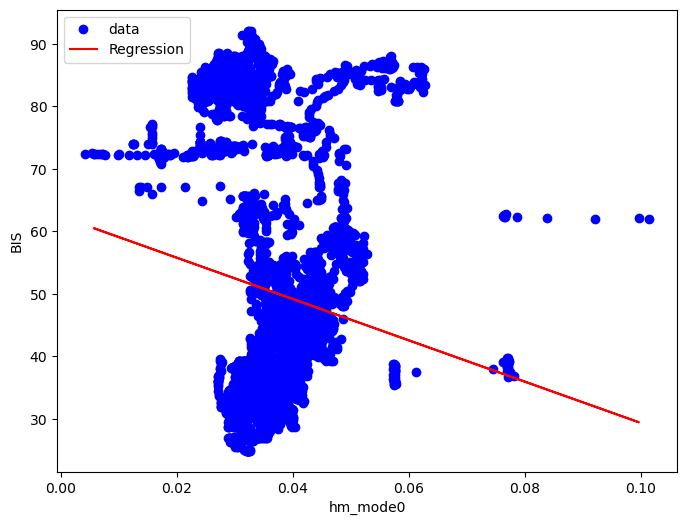

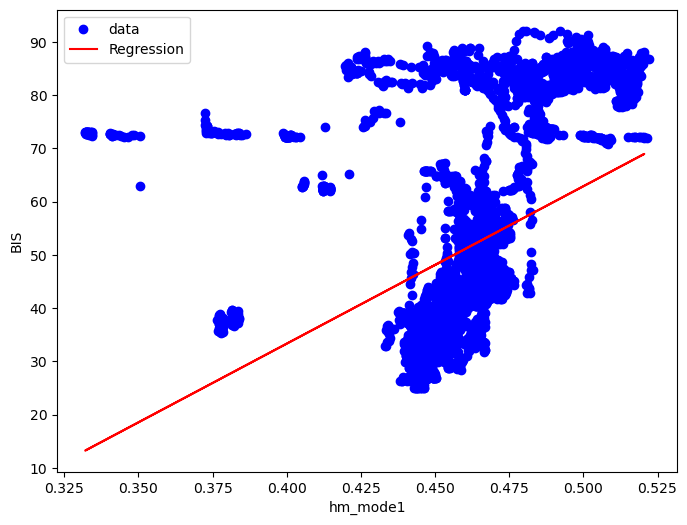

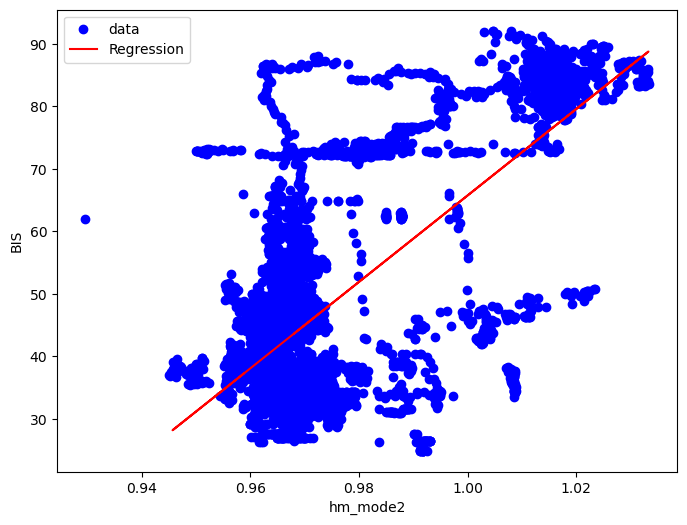

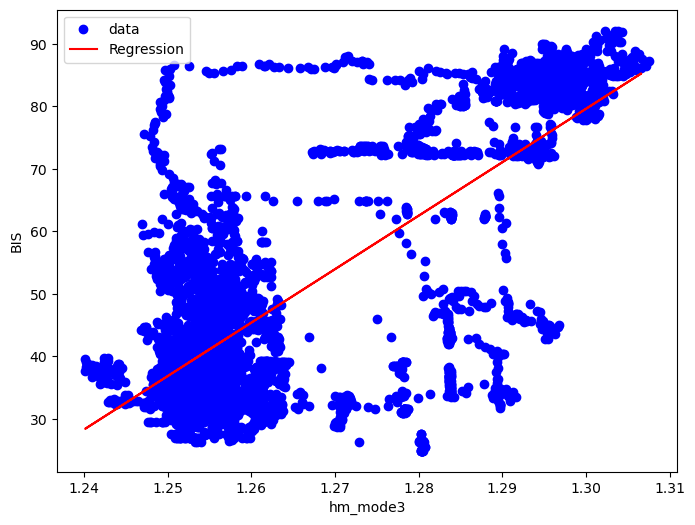

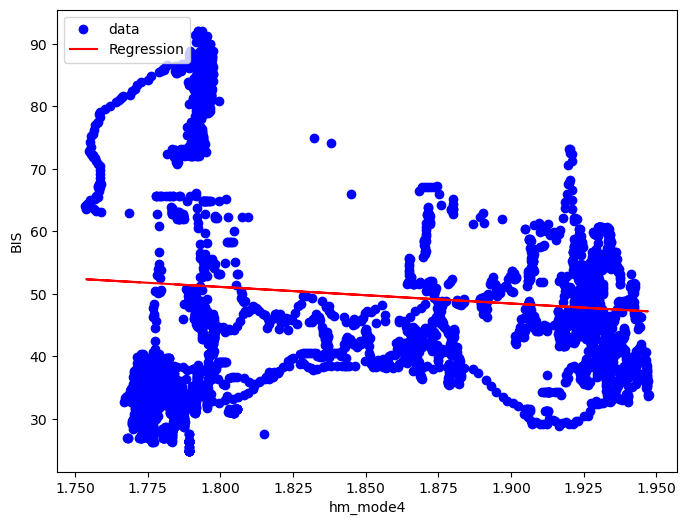

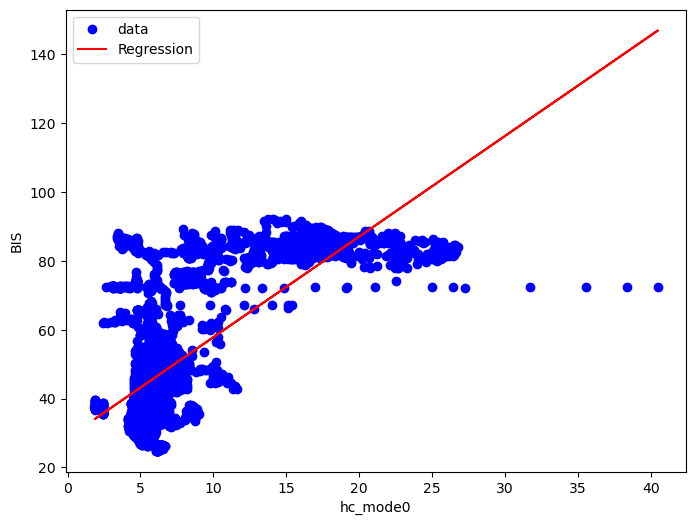

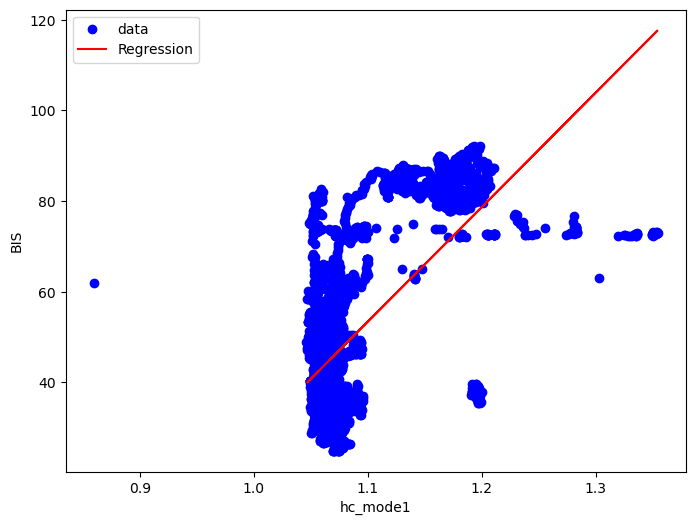

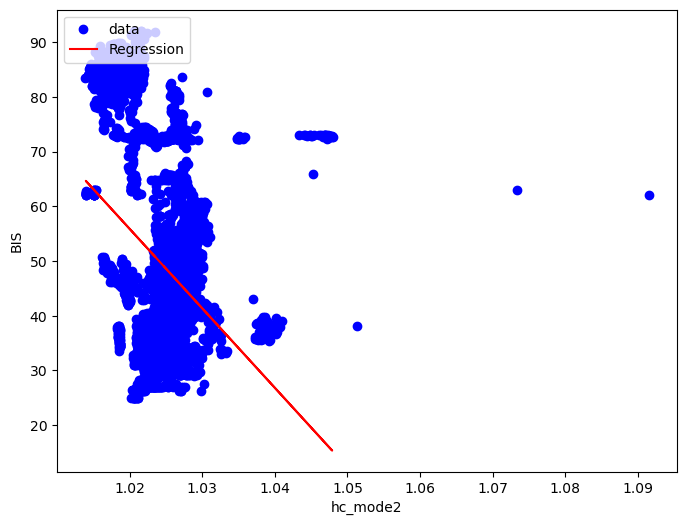

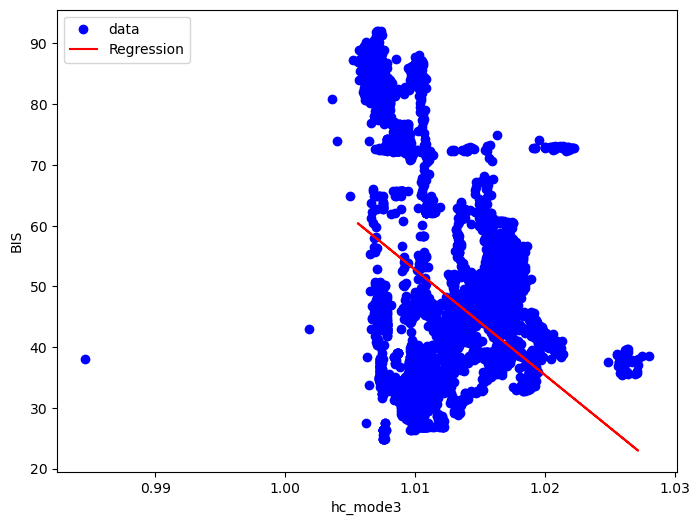

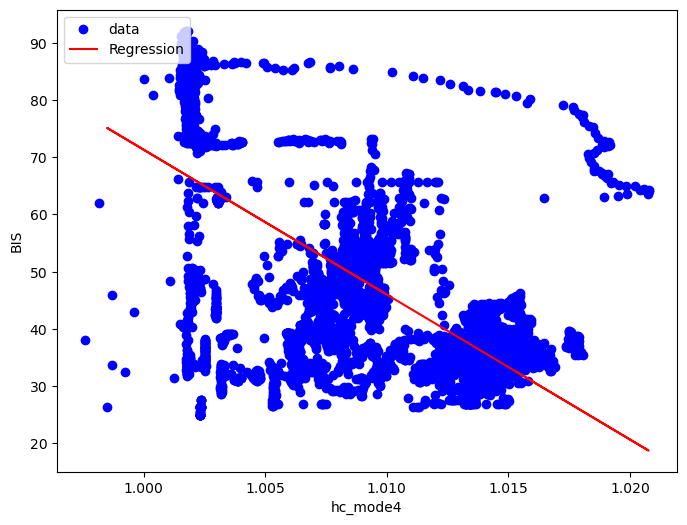

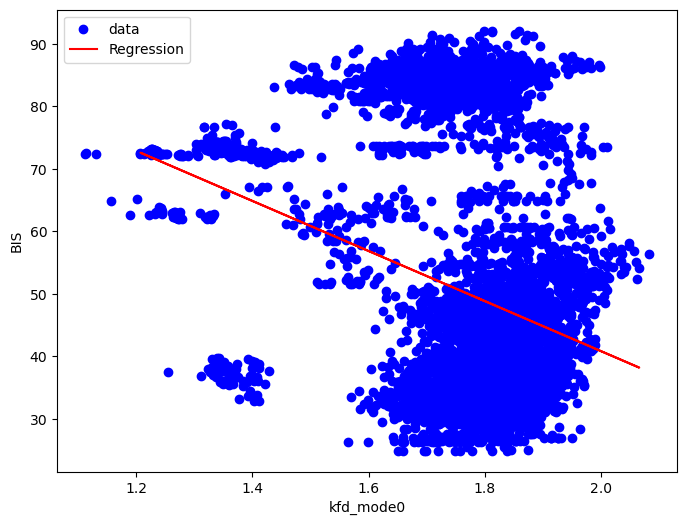

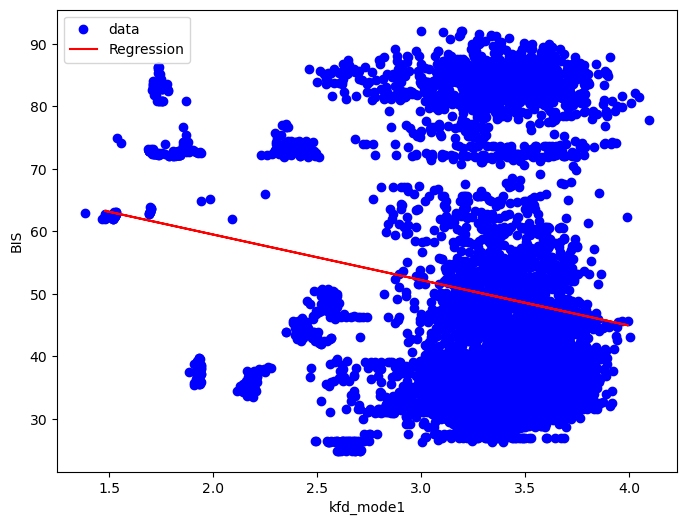

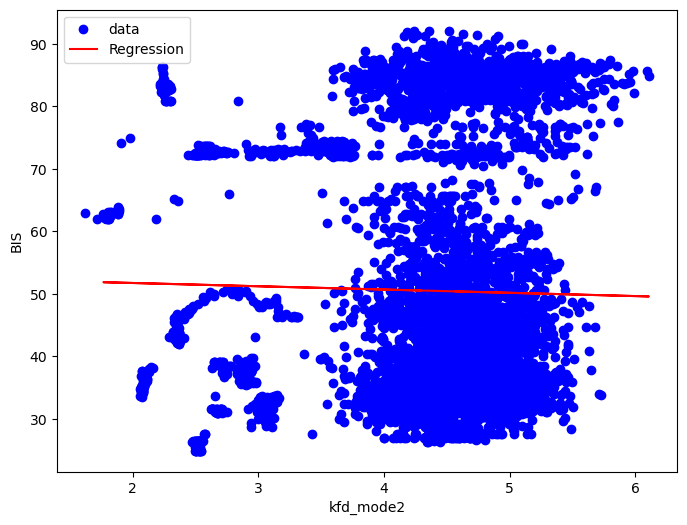

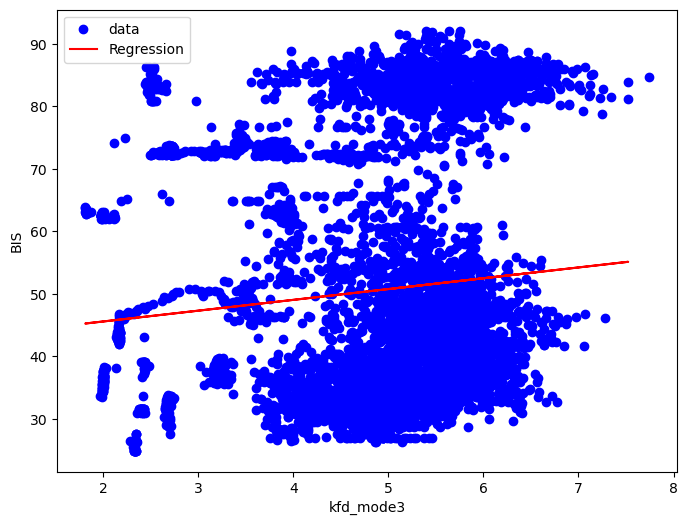

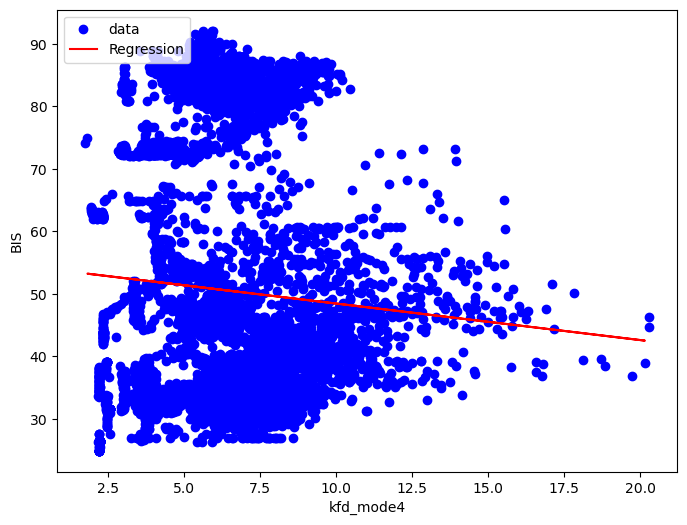

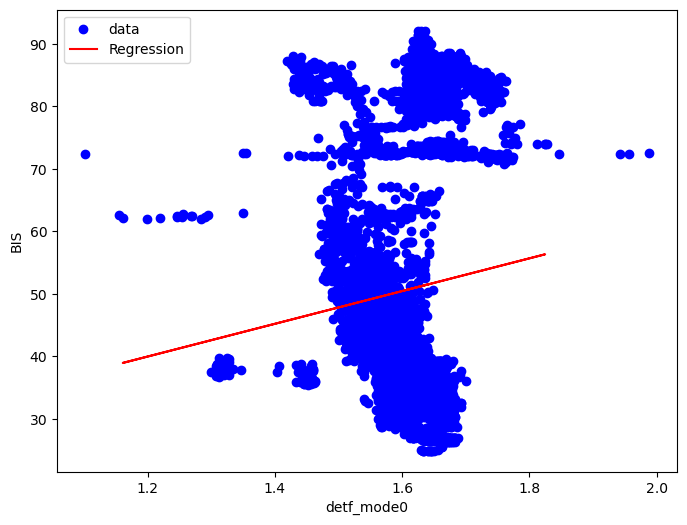

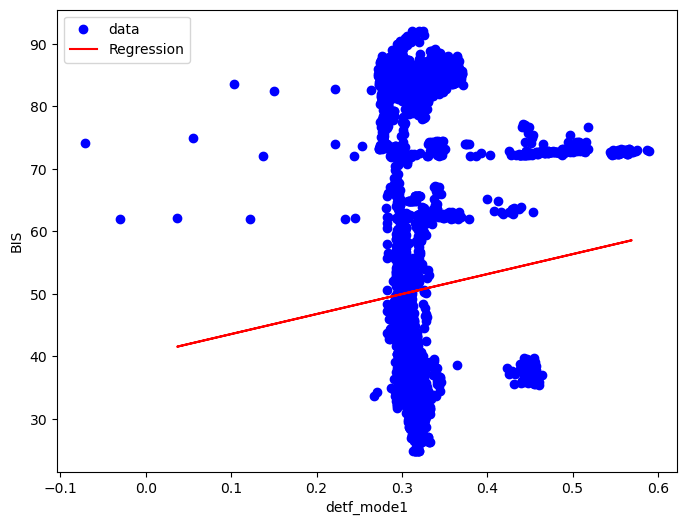

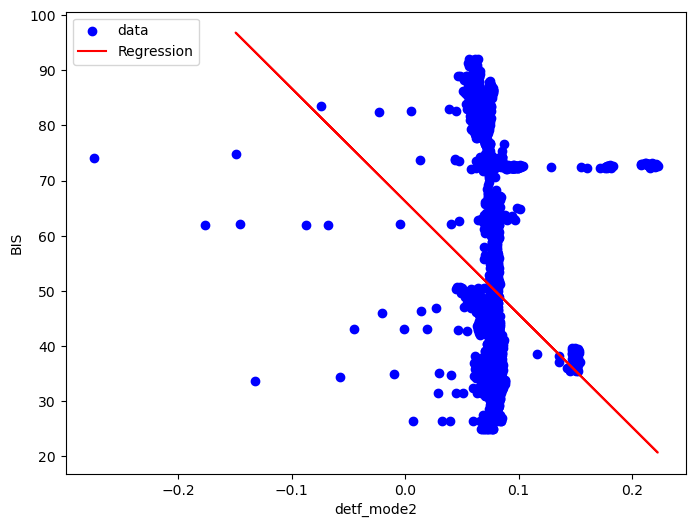

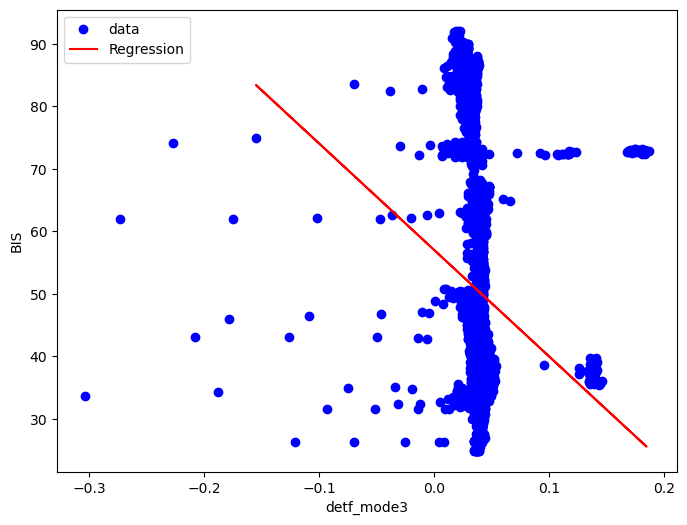

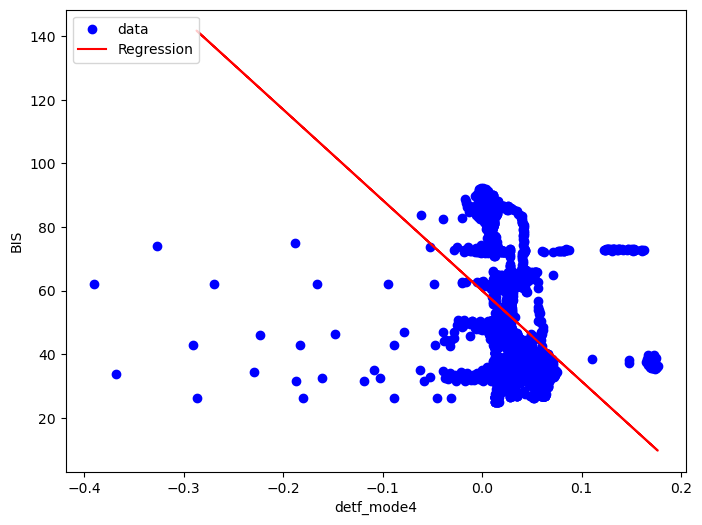

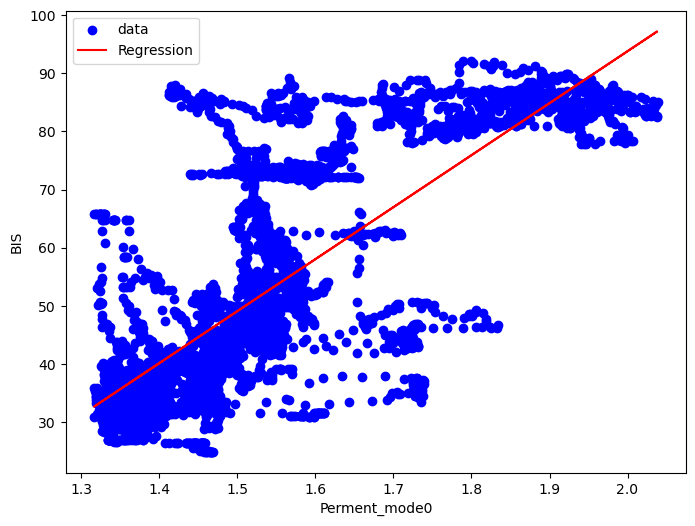

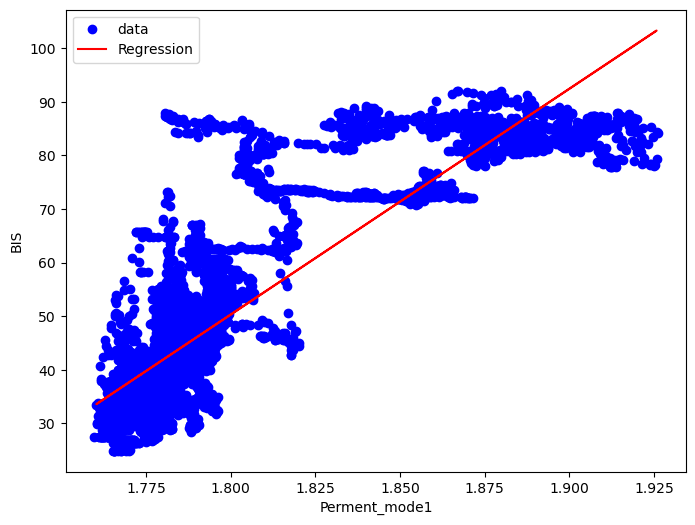

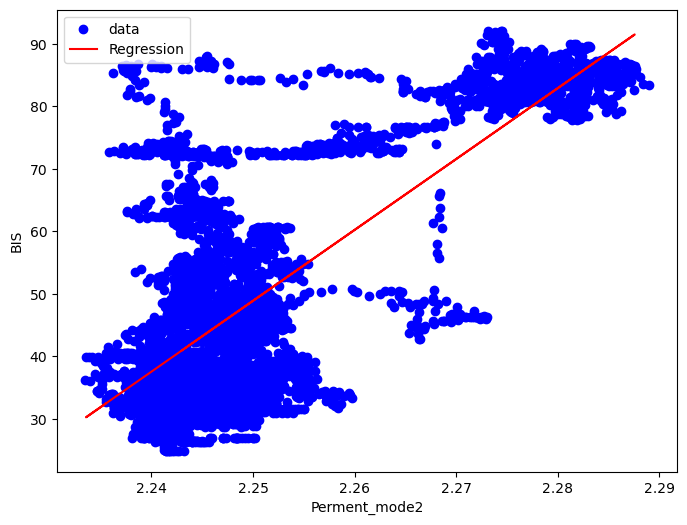

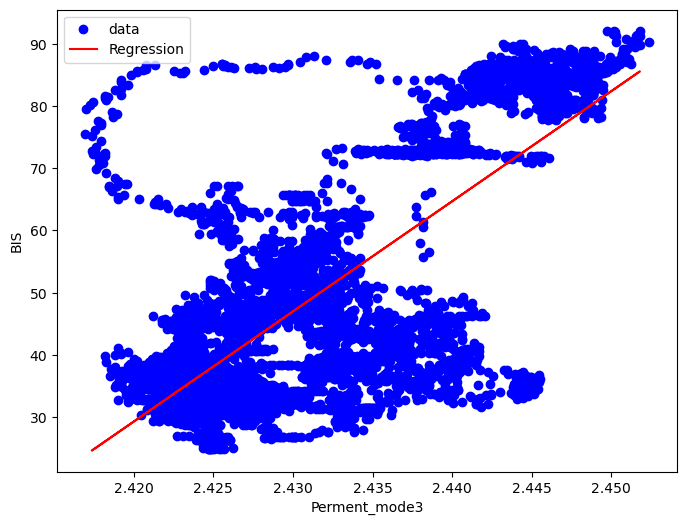

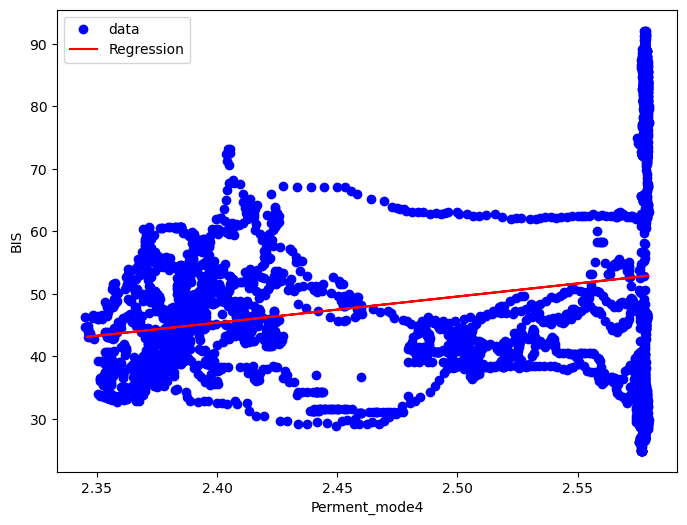

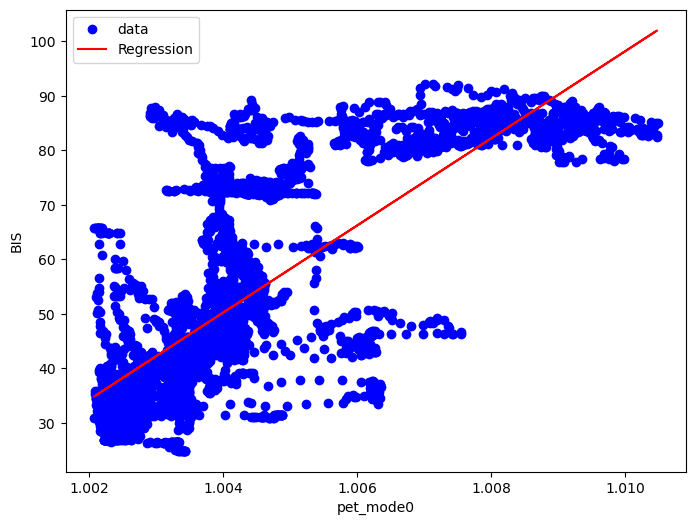

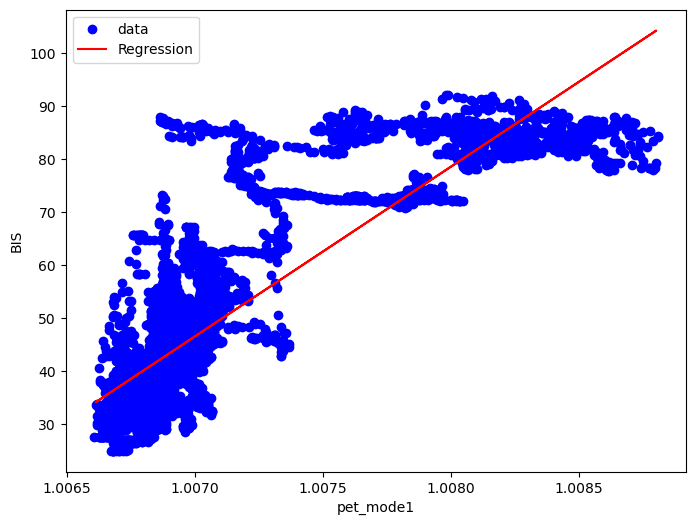

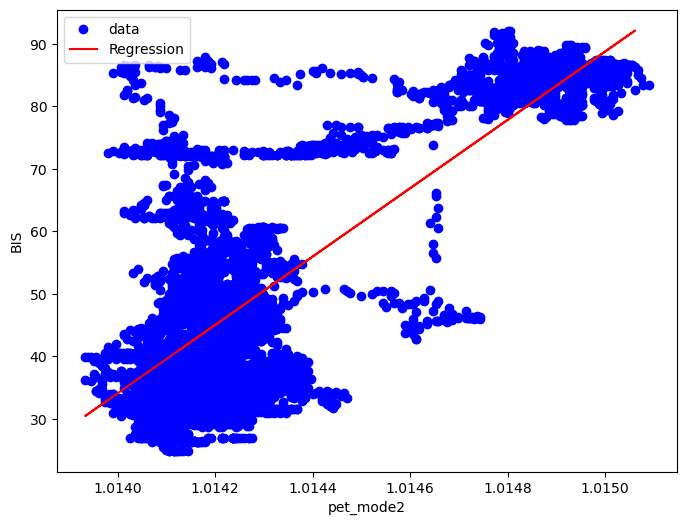

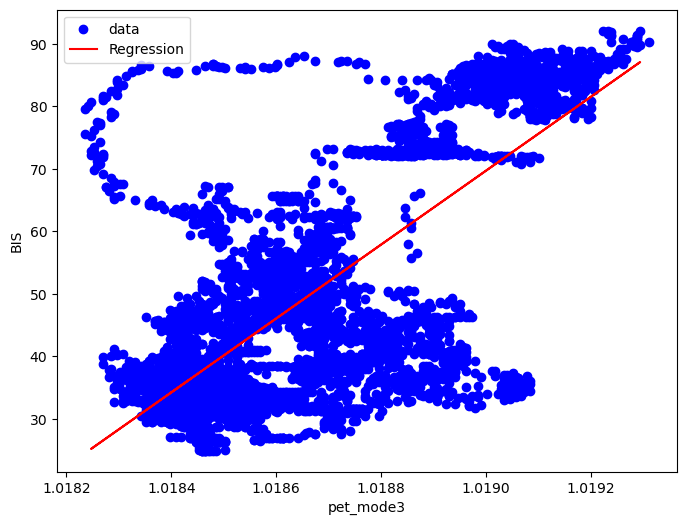

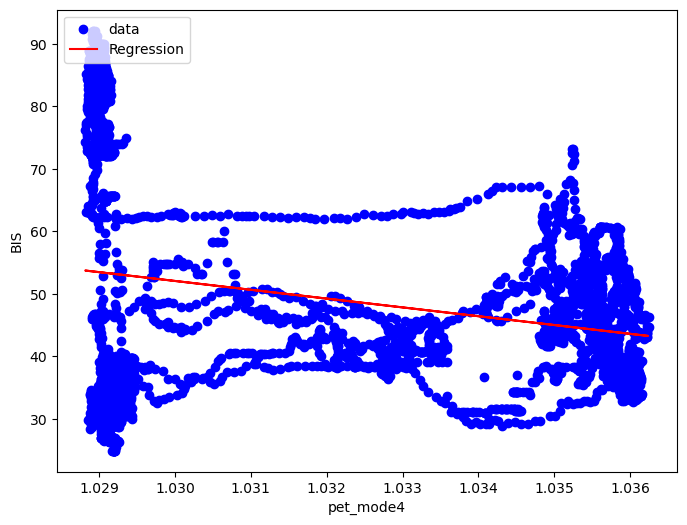

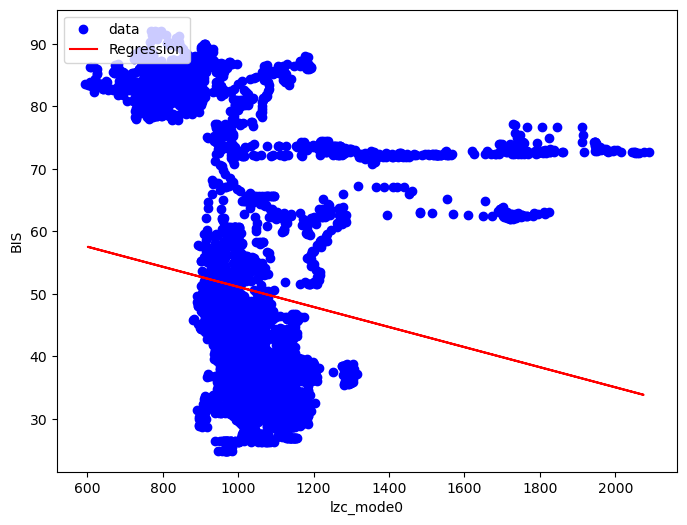

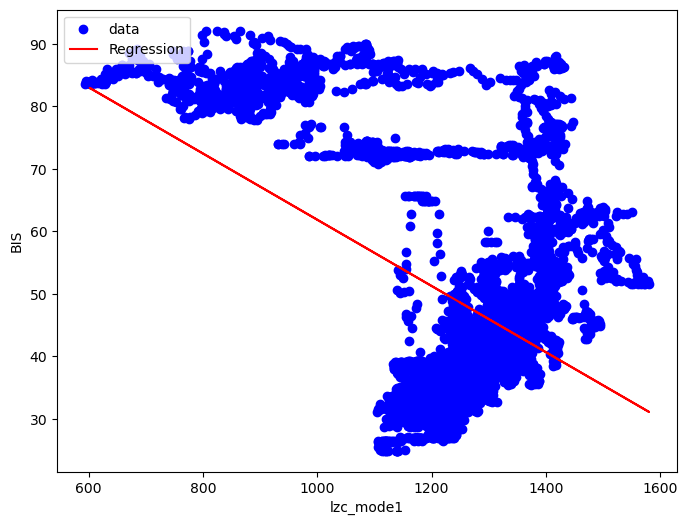

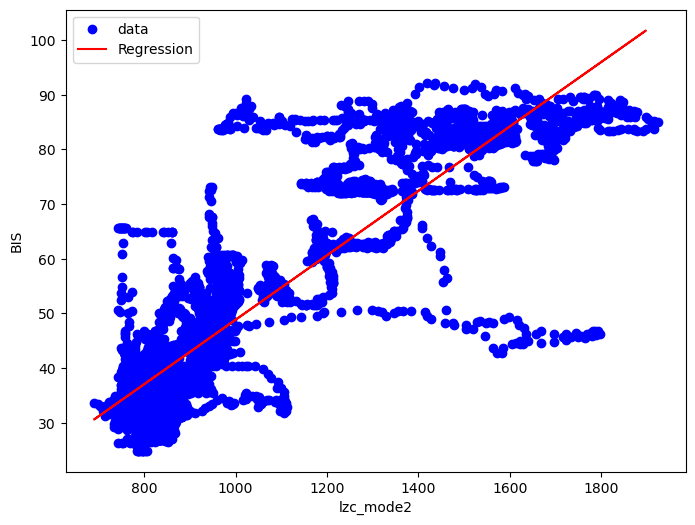

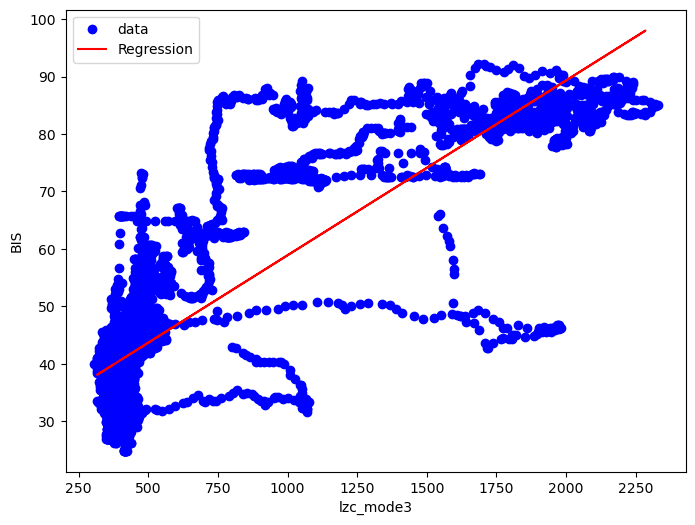

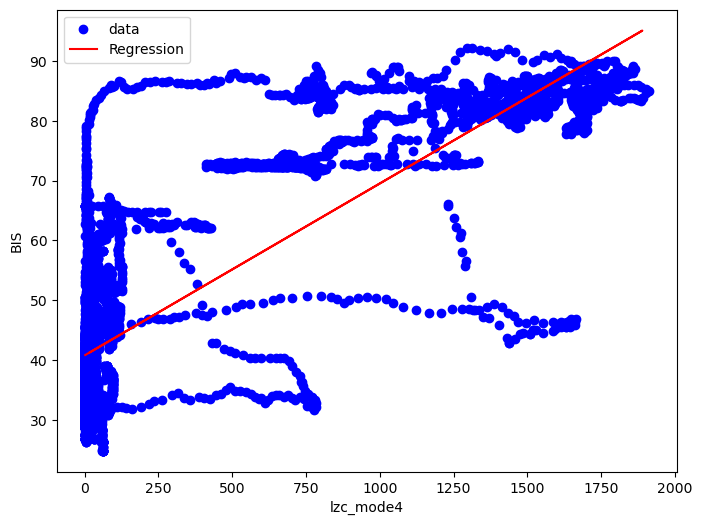

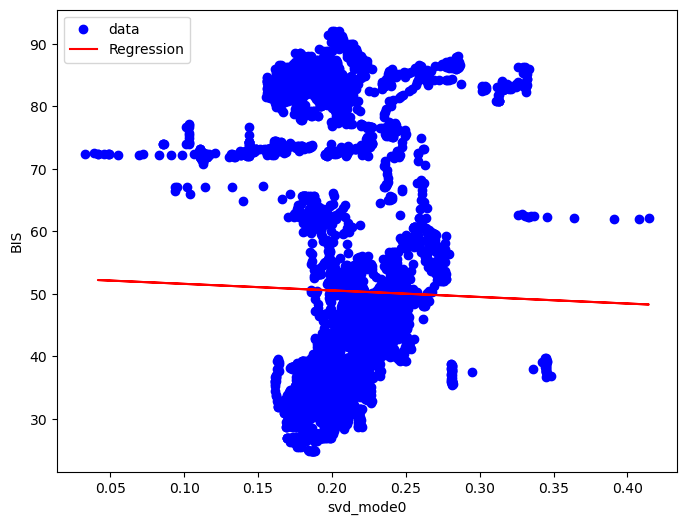

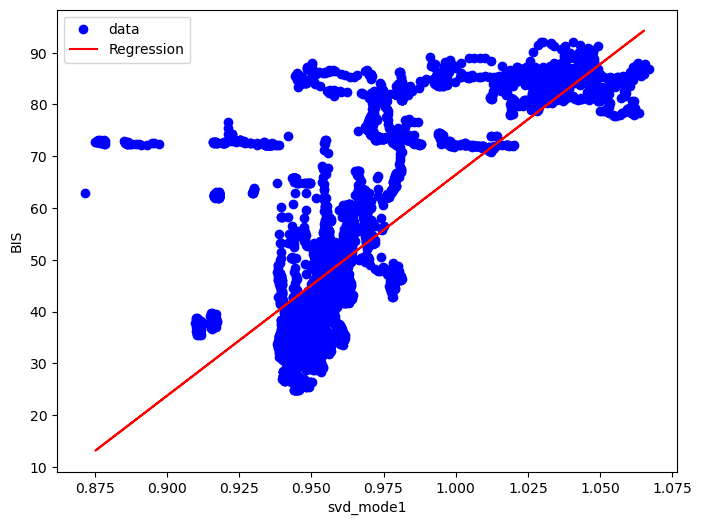

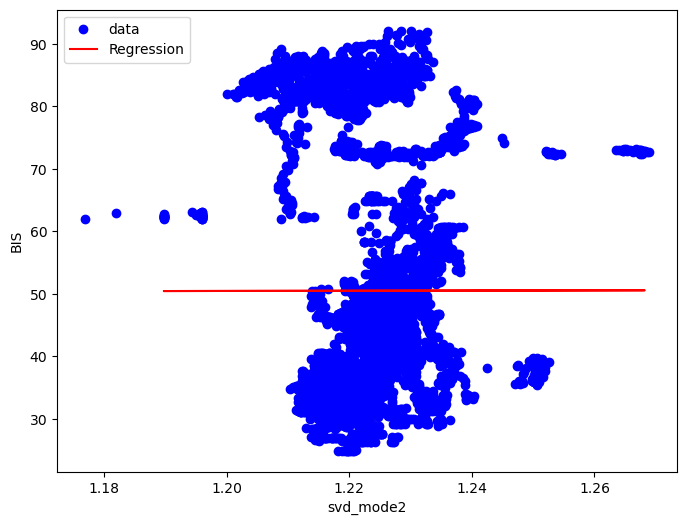

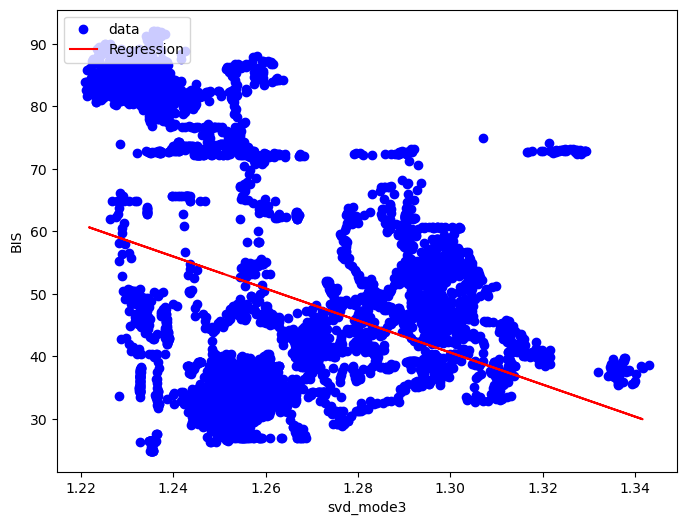

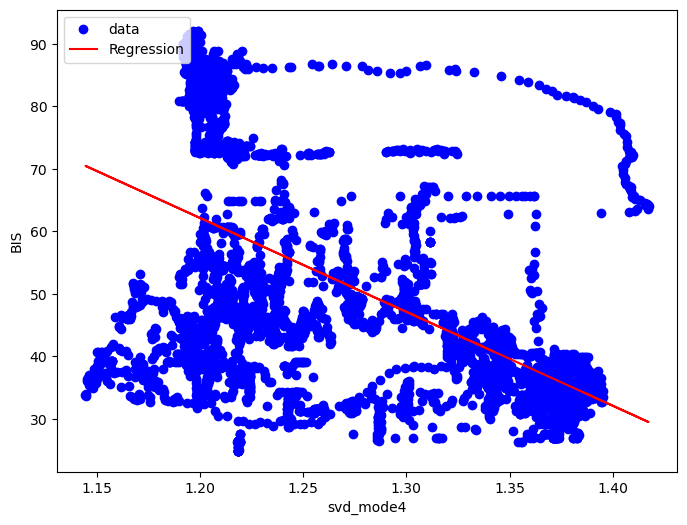

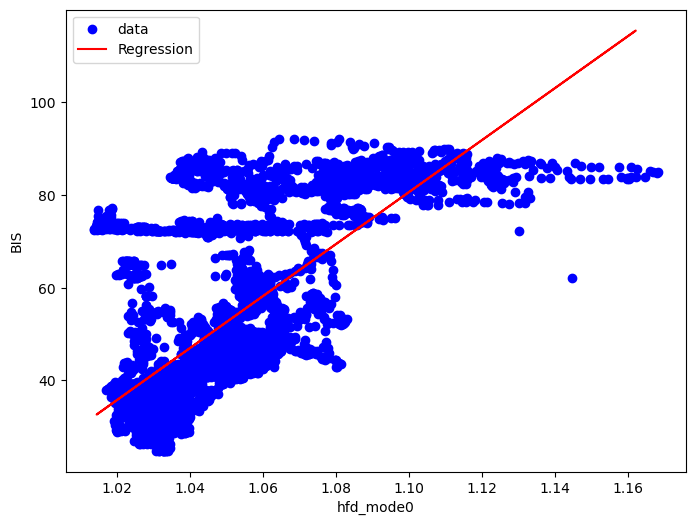

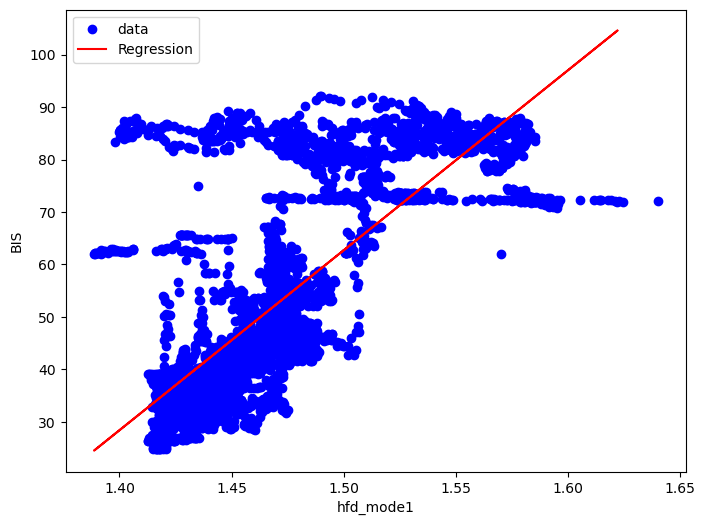

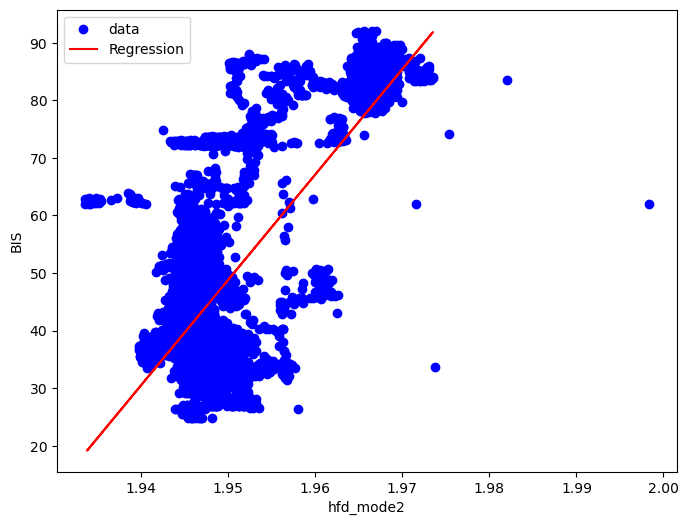

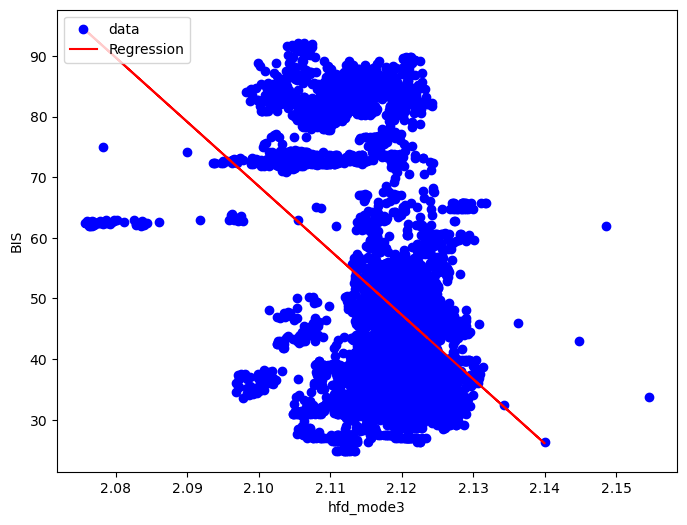

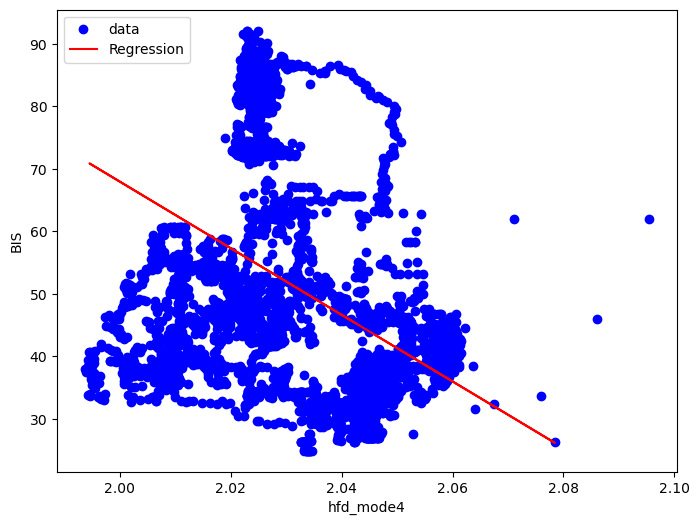

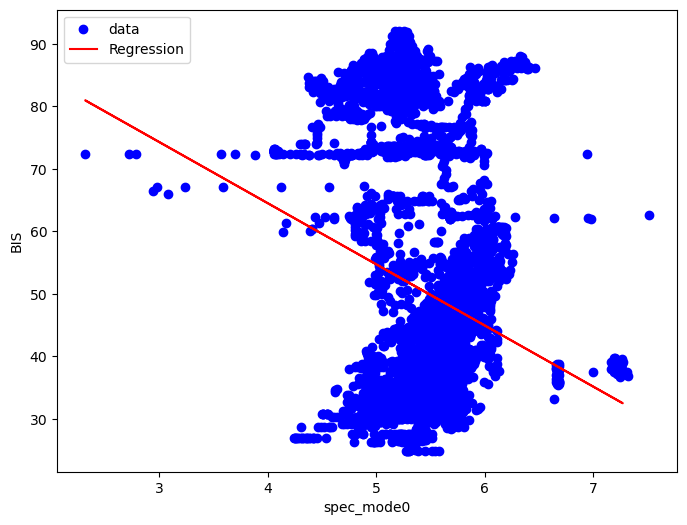

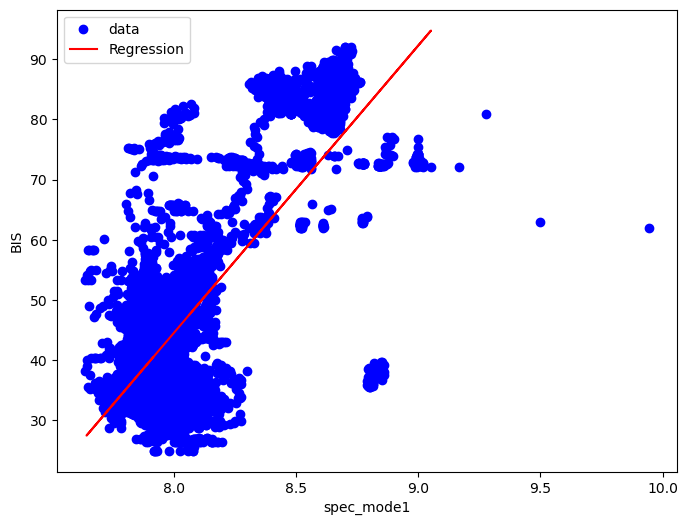

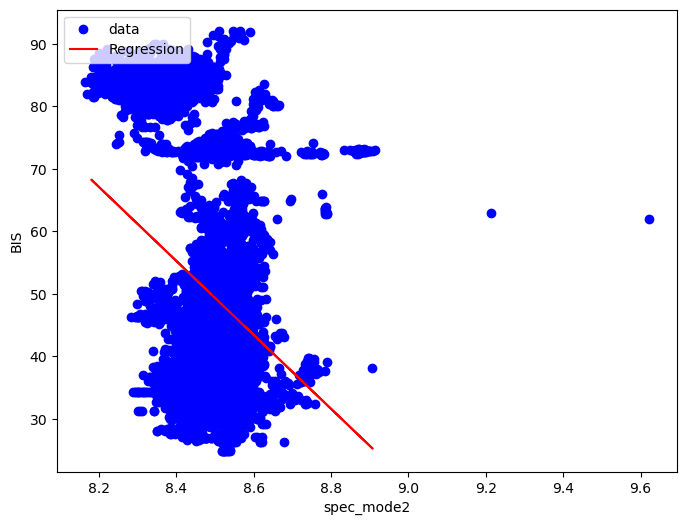

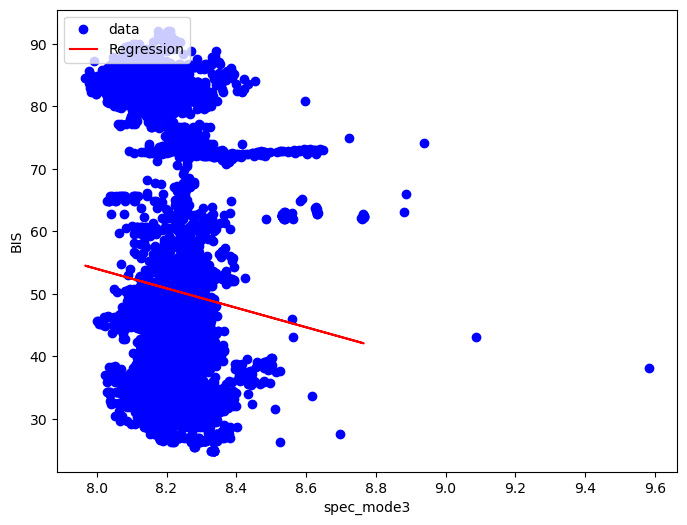

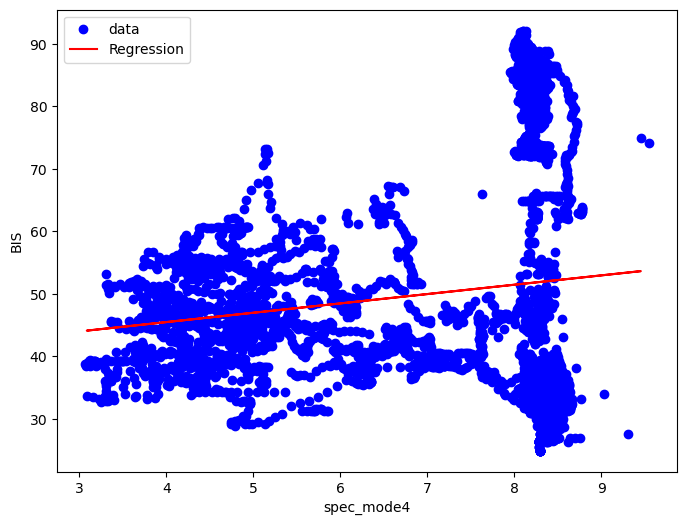

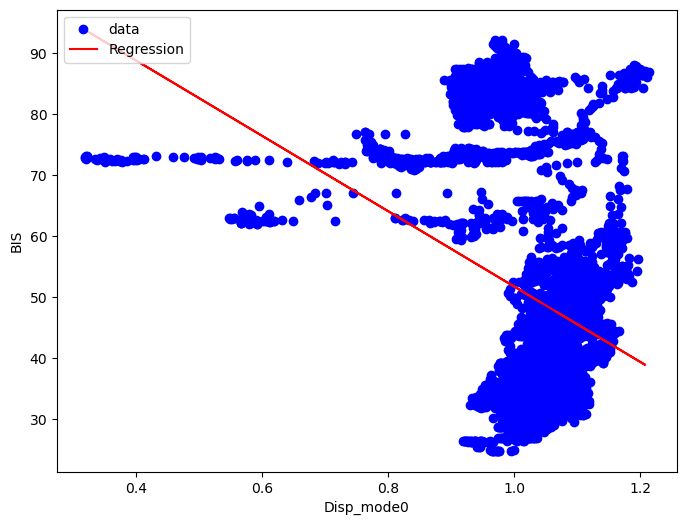

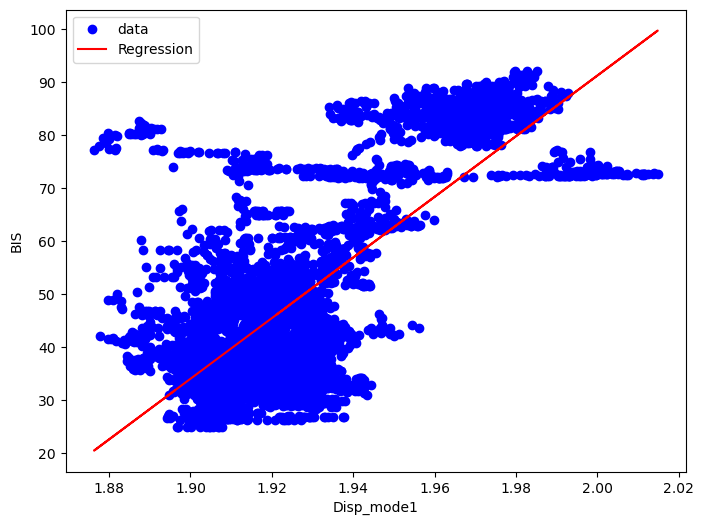

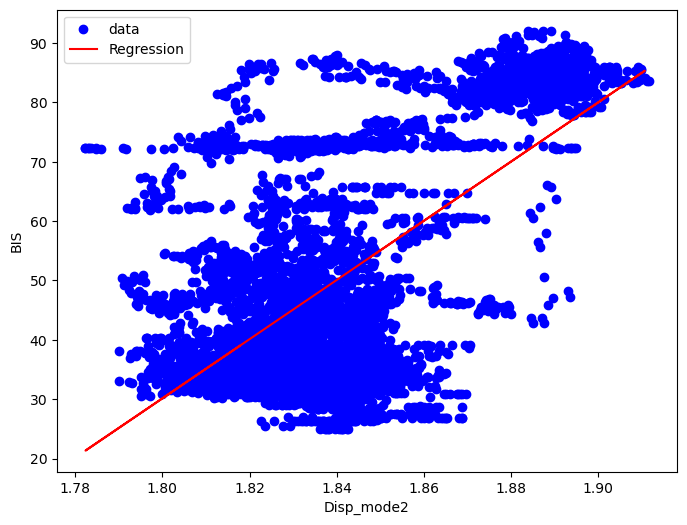

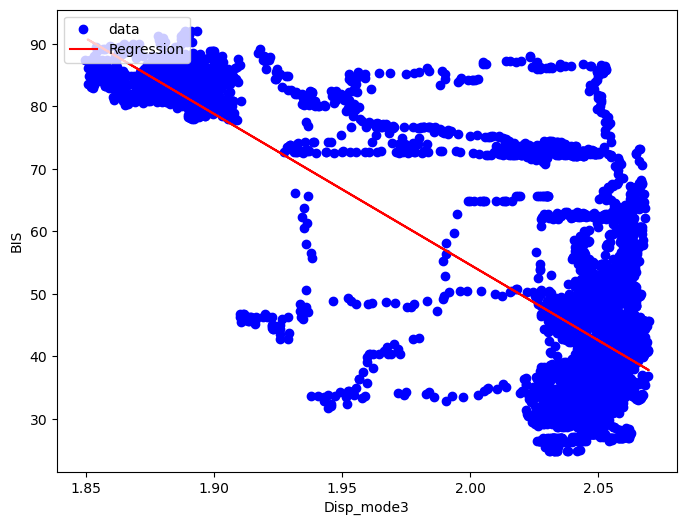

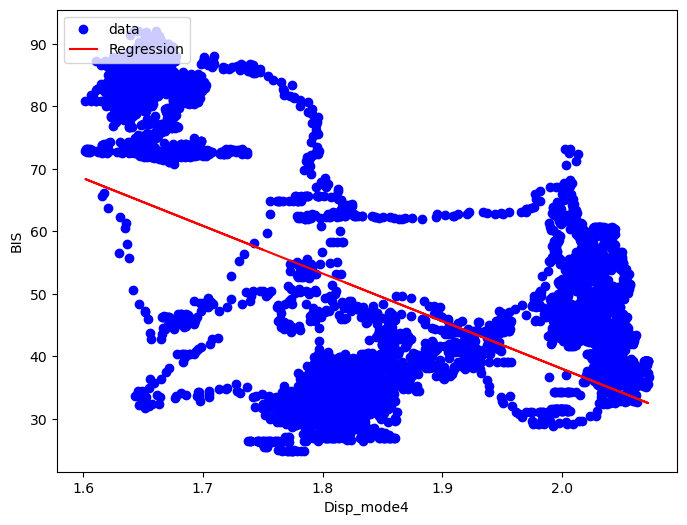

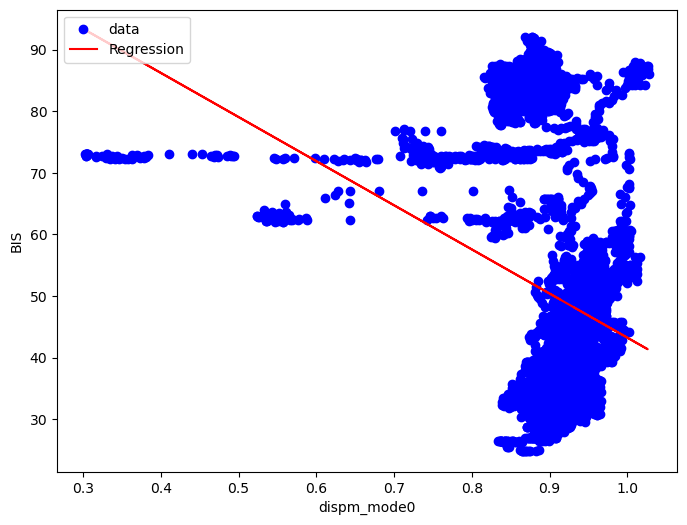

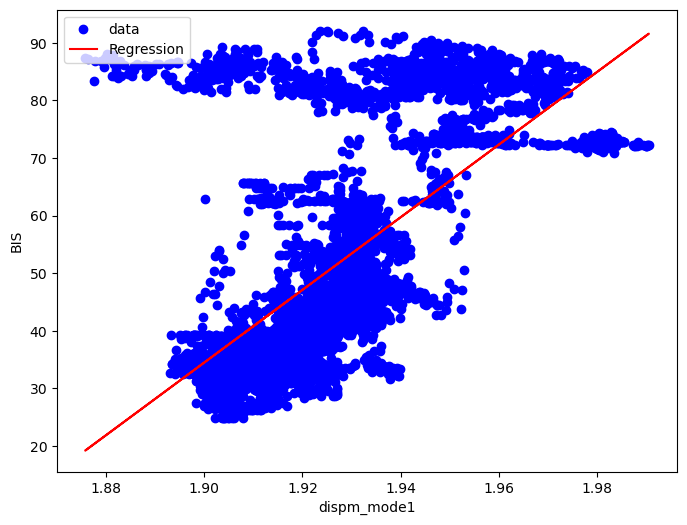

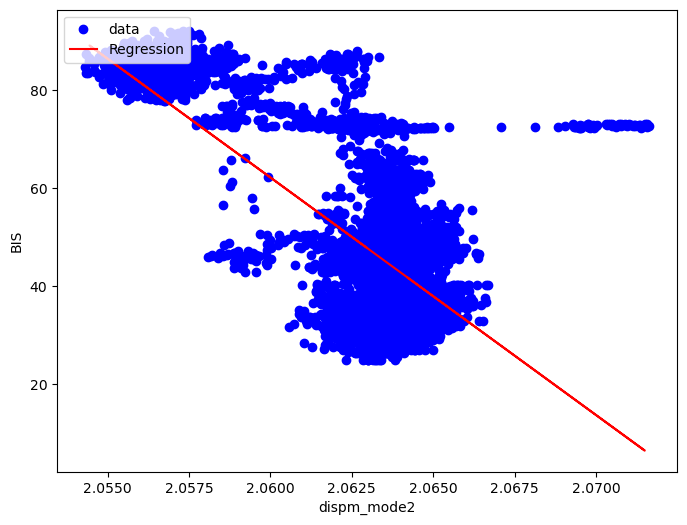

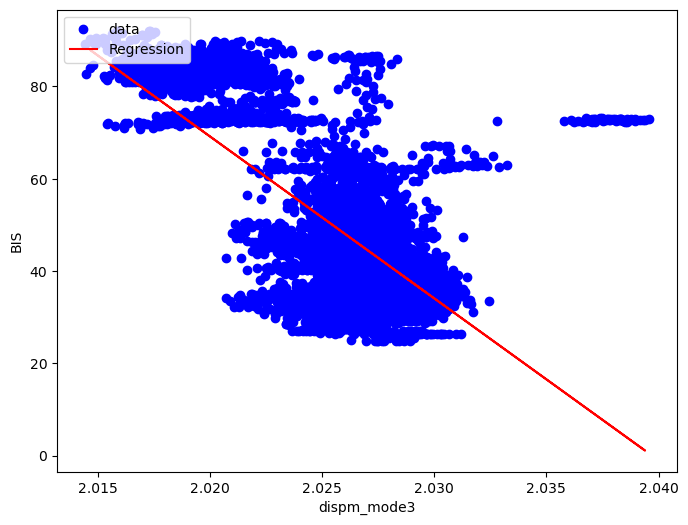

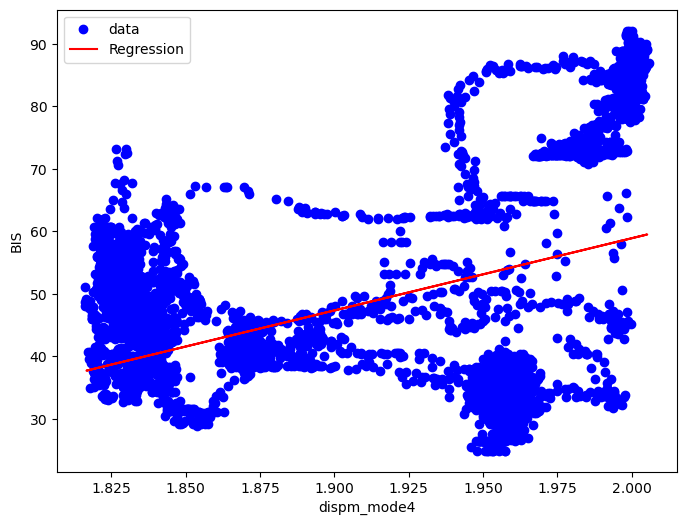

In [6]:

for column in patient_40.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient_40, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
32,lzc_mode2_r2,76.580775
21,Perment_mode1_r2,75.385726
26,pet_mode1_r2,74.686707
33,lzc_mode3_r2,72.603611
34,lzc_mode4_r2,67.736504
20,Perment_mode0_r2,61.473942
25,pet_mode0_r2,59.940693
53,Disp_mode3_r2,58.227045
27,pet_mode2_r2,56.420940
22,Perment_mode2_r2,56.333714


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
33      lzc_mode3    0.593654
32      lzc_mode2    0.100924
21  Perment_mode1    0.082814
6        hc_mode1    0.057351
1        hm_mode1    0.035987
16     detf_mode1    0.012356
4        hm_mode4    0.009628
46     spec_mode1    0.008933
41      hfd_mode1    0.006061
55    dispm_mode0    0.005582
22  Perment_mode2    0.005205
51     Disp_mode1    0.004929
40      hfd_mode0    0.004829
53     Disp_mode3    0.004737
20  Perment_mode0    0.004730
19     detf_mode4    0.003843
35      svd_mode0    0.003782
30      lzc_mode0    0.003627
25      pet_mode0    0.003450
54     Disp_mode4    0.003211
31      lzc_mode1    0.003084
56    dispm_mode1    0.002507
10      kfd_mode0    0.002215
50     Disp_mode0    0.002045
24  Perment_mode4    0.002017
29      pet_mode4    0.001960
49     spec_mode4    0.001777
0        hm_mode0    0.001770
39      svd_mode4    0.001758
38      svd_mode3    0.001750
36      svd_mode1    0.001636
7        hc_mode2    0.001595
3        h